In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
from plotutils import *
rc('text', usetex=True)

In [3]:
# date = '09_19_2021'
# tol = 1e-6
date = '09_27_2021'
tol = 1e-5

In [44]:
schimdt = get_all(logdir='../IPG/test/log', date=[date], inexact_type='schimdt', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[1e0, 1e1, 1e2, 1e3, 1e4])
schimdt_time = collect_time(schimdt)

schimdt-1.0
 71/72 instances terminate with status:  0
  1/72 instances terminate with status:  4
schimdt-10.0
 71/72 instances terminate with status:  0
  1/72 instances terminate with status:  4
schimdt-100.0
 71/72 instances terminate with status:  0
  1/72 instances terminate with status:  4
schimdt-1000.0
 71/72 instances terminate with status:  0
  1/72 instances terminate with status:  1
schimdt-10000.0
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  1


In [48]:
lee = get_all(logdir='../IPG/test/log', date=[date], inexact_type='lee', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[0.1, 0.2, 0.3, 0.4, 0.5])
lee_time = collect_time(lee)

lee-0.1
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
lee-0.2
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
lee-0.3
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
lee-0.4
 71/72 instances terminate with status:  0
  1/72 instances terminate with status:  4
lee-0.5
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4


In [46]:
yd = get_all(logdir='../IPG/test/log', date=['09_30_2021'], inexact_type='yd', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[0.1, 0.2, 0.3, 0.4, 0.5])
yd_time = collect_time(yd)

yd-0.1
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
yd-0.2
 71/72 instances terminate with status:  0
  1/72 instances terminate with status:  4
yd-0.3
 71/72 instances terminate with status:  0
  1/72 instances terminate with status:  4
yd-0.4
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
yd-0.5
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4


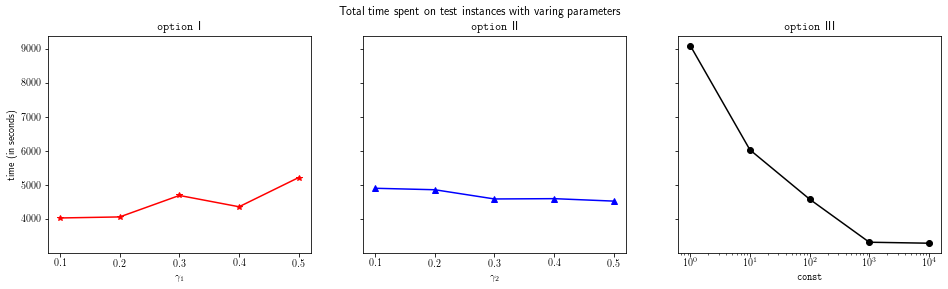

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16,4))
fig.suptitle('Total time spent on test instances with varing parameters')
ax1.plot([0.1, 0.2, 0.3, 0.4, 0.5], yd_time, 'r-*')
ax1.set_xlabel(r'$\gamma_1$')
ax1.set_ylabel('time (in seconds)')
ax1.set_title(r'\texttt{option} I')
ax2.plot([0.1, 0.2, 0.3, 0.4, 0.5], lee_time, 'b-^')
ax2.set_xlabel(r'$\gamma_2$')
ax2.set_title(r'\texttt{option} II')
ax3.plot([1e0, 1e1, 1e2, 1e3, 1e4], schimdt_time, 'k-o')
ax3.set_xlabel(r'\texttt{const}')
ax3.set_xscale('log')
ax3.set_title(r'\texttt{option} III')
fig.savefig("./natOG/paramter_sensitivity.pdf", dpi=300)

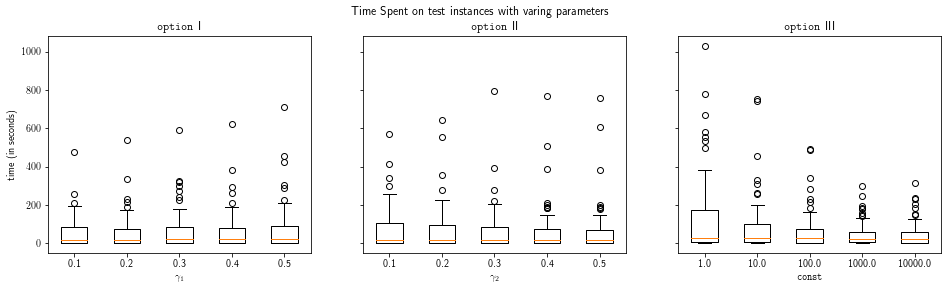

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16,4))
fig.suptitle('Time Spent on test instances with varing parameters')
ax1.boxplot(prepare_box(yd))
ax1.set_xlabel(r'$\gamma_1$')
ax1.set_xticklabels([0.1, 0.2, 0.3, 0.4, 0.5])
ax1.set_ylabel('time (in seconds)')
ax1.set_title(r'\texttt{option} I')
ax2.boxplot(prepare_box(lee))
ax2.set_xlabel(r'$\gamma_2$')
ax2.set_xticklabels([0.1, 0.2, 0.3, 0.4, 0.5])
ax2.set_title(r'\texttt{option} II')
ax3.boxplot(prepare_box(schimdt))
ax3.set_xlabel(r'\texttt{const}')
ax3.set_xticklabels([1e0, 1e1, 1e2, 1e3, 1e4])
ax3.set_title(r'\texttt{option} III')
fig.savefig("./natOG/paramter_hist.pdf", dpi=300)

## Morales Plots

In [51]:
# schimdt = get_all(logdir='../IPG/test/log', date=date, inexact_type='schimdt', loss='logit', use_ckpt=True, tol = tol, 
#         lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[1e0, 1e1, 1e2, 1e3, 1e4])
ppf = PerformanceProfile(schimdt)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
schimdt_best = get_best(pools)
print('Best params:', schimdt_best)

All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 72 instances are kept.
Best params: schimdt-1000.0


In [52]:
# lee = get_all(logdir='../IPG/test/log', date=date, inexact_type='lee', loss='logit', use_ckpt=True, tol = tol, 
#         lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[0.1, 0.2, 0.3, 0.4, 0.5])
ppf = PerformanceProfile(lee)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
lee_best = get_best(pools)
print('Best params:', lee_best)

All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 72 instances are kept.
Best params: lee-0.5


In [78]:
# yd = get_all(logdir='../IPG/test/log', date=date, inexact_type='yd', loss='logit', use_ckpt=True, tol = tol, 
#         lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[0.1, 0.2, 0.3, 0.4, 0.5])
ppf = PerformanceProfile(yd)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
yd_best = get_best(pools)
print('Best params:', yd_best)

All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 72 instances are kept.
Best params: yd-0.2


In [79]:
cols = ['datasetid', 'F', 'time', 'nz']
schimdt_df = schimdt[schimdt_best][cols].copy()
lee_df = lee[lee_best][cols].copy()
yd_df = yd[yd_best][cols].copy()

def pair_wise_comparison(df1, df2, suffixes_lst):
    df12_merged = pd.merge(df1, df2, on='datasetid', 
                           suffixes=(suffixes_lst[0], suffixes_lst[1]), how='left')
    better12_z = np.sum((df12_merged[f'nz{suffixes_lst[0]}'] - df12_merged[f'nz{suffixes_lst[1]}']) > 0 )
    same12_z = np.sum((df12_merged[f'nz{suffixes_lst[0]}'] - df12_merged[f'nz{suffixes_lst[1]}']) == 0 ) 
    worse12_z = np.sum((df12_merged[f'nz{suffixes_lst[0]}'] - df12_merged[f'nz{suffixes_lst[1]}']) < 0 ) 
    
    better12_F = np.sum((df12_merged[f'F{suffixes_lst[0]}'] - df12_merged[f'F{suffixes_lst[1]}']) < -1e-8 )
    same12_F = np.sum(np.abs(df12_merged[f'F{suffixes_lst[0]}'] - df12_merged[f'F{suffixes_lst[1]}']) <=1e-8 ) 
    worse12_F = np.sum((df12_merged[f'F{suffixes_lst[0]}'] - df12_merged[f'F{suffixes_lst[1]}']) > 1e-8 )     

    print(f"For {suffixes_lst[0]}-{suffixes_lst[1]} comparsion:\n==========================")
    print(" In terms final F:")
    print(f"  better:{better12_F} | same:{same12_F} | worse: {worse12_F}")
    print(" In terms #z:")
    print(f"  better:{better12_z} | same:{same12_z} | worse: {worse12_z}")
    return better12_z, same12_z, worse12_z, better12_F, same12_F, worse12_F

In [80]:
pair_wise_comparison(yd_df, lee_df, suffixes_lst=['yd', 'lee'])

For yd-lee comparsion:
 In terms final F:
  better:0 | same:71 | worse: 1
 In terms #z:
  better:1 | same:67 | worse: 4


(1, 67, 4, 0, 71, 1)

In [81]:
pair_wise_comparison(yd_df, schimdt_df, suffixes_lst=['yd', 'schimdt'])

For yd-schimdt comparsion:
 In terms final F:
  better:4 | same:67 | worse: 1
 In terms #z:
  better:3 | same:69 | worse: 0


(3, 69, 0, 4, 67, 1)

In [82]:
pair_wise_comparison(lee_df, schimdt_df, suffixes_lst=['lee', 'schimdt'])

For lee-schimdt comparsion:
 In terms final F:
  better:4 | same:67 | worse: 1
 In terms #z:
  better:6 | same:65 | worse: 1


(6, 65, 1, 4, 67, 1)

All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 72 instances are kept.
yd-0.2 Win:33 | Lose:39
yd-0.2 Win:46 | Lose:26
lee-0.5 Win:43 | Lose:29


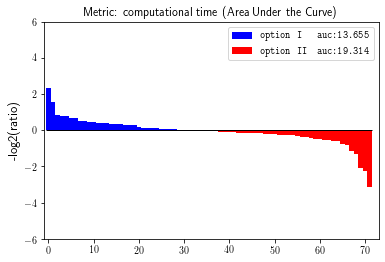

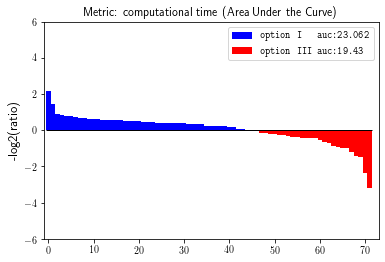

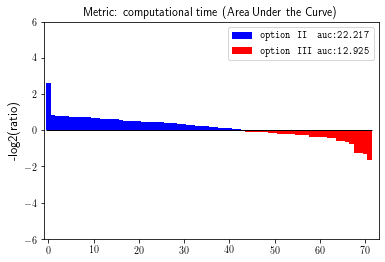

In [83]:
final = {}
final[yd_best] = yd[yd_best]
final[lee_best] = lee[lee_best]
final[schimdt_best] = schimdt[schimdt_best]
ppf = PerformanceProfile(final)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
_ = ppf.plot(column='time',show_num=False, options={'ratio_max':6}, save=True, saveDir='./natOG/', labels=['option I\ \ \ ', 'option II\ \ ', 'option III'])

# Large Scale

In [84]:
yd_best, lee_best, schimdt_best

('yd-0.2', 'lee-0.5', 'schimdt-1000.0')

In [19]:
date = '09_28_2021'
tol = 1e-5

In [26]:
schimdt = get_all(logdir='../IPG/test/log', date=date, inexact_type='schimdt', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], param_lst=[1e3])
schimdt_time = collect_time(schimdt)

schimdt-1000.0
  9/24 instances terminate with status:  0
 15/24 instances terminate with status:  1


In [27]:
ls ../IPG/test/log/09_28_2021/schimdt/logit/logfile/0.01_100_0.1_1000.0

gisette_info.npy  gisette.txt  madelon_info.npy  madelon.txt


In [31]:
cat ../IPG/test/log/cache/schimdt_logit_0.1_100_0.1_1000.0.err

../src/solver.py:128: RuntimeWarning: invalid value encountered in sqrt
  self.optim_ub = self.aoptim + np.sqrt(2 * self.r.gap * self.alphak)
../src/solver.py:128: RuntimeWarning: invalid value encountered in sqrt
  self.optim_ub = self.aoptim + np.sqrt(2 * self.r.gap * self.alphak)
Traceback (most recent call last):
  File "runall.py", line 186, in <module>
    datasets, '../../../GroupFaRSA/db', config, save_ckpt, milestone)
  File "runall.py", line 104, in runall
    milestone, date, config)
  File "runall.py", line 74, in _unit_problem
    r = NatOG(penalty=lammax * lam_shrink, groups=groups, weights=None)
  File "../src/regularizer.py", line 88, in __init__
    self.A = np.zeros((p, self.lifted_dimension))
MemoryError: Unable to allocate 18.5 GiB for an array with shape (47236, 52476) and data type float64


In [4]:
def get_all(logdir, date, inexact_type, loss, use_ckpt, tol,
            lam_shrink, group_size, overlap_ratio,
            excludes=None, param_lst=None):
    algo_df_dict = {}
    for p in param_lst:
        algorithm = f'{inexact_type}-{p}'
        print(f'{algorithm}')
        paths = []
        for date_ in date:
            paths_ = create_paths(logdir, date_, inexact_type, loss, use_ckpt, tol, 
                                 lam_shrink, group_size, overlap_ratio, excludes, p=p)
            paths += paths_
        if paths == []:
            print(' empty')
            df = None
        else:
            df = load_df_from_paths(paths)
        algo_df_dict[algorithm] = df
    return algo_df_dict

In [18]:
schimdt_df = get_all(logdir='../IPG/test/log', date=['09_27_2021','09_28_2021', '09_29_2021'], inexact_type='schimdt', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], param_lst=[1e3])

schimdt-1000.0
 107/132 instances terminate with status:  0
  16/132 instances terminate with status:  1
   9/132 instances terminate with status:  2


In [11]:
lee_df = get_all(logdir='../IPG/test/log', date=['09_27_2021','09_28_2021', '09_29_2021'], inexact_type='lee', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], param_lst=[0.5])

lee-0.5
 107/132 instances terminate with status:  0
   2/132 instances terminate with status:  4
  15/132 instances terminate with status:  1
   8/132 instances terminate with status:  2


In [12]:
yd_df = get_all(logdir='../IPG/test/log', date=['09_30_2021','09_28_2021', '09_29_2021'], inexact_type='yd', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], param_lst=[0.2])

yd-0.2
 108/129 instances terminate with status:  0
   1/129 instances terminate with status:  4
  13/129 instances terminate with status:  1
   7/129 instances terminate with status:  2


In [20]:
schimdt_df['schimdt-1000.0'][schimdt_df['schimdt-1000.0']['status'] == 1]

,datasetid,status,time,iteration,subits,F,optim,nz,nnz
32,duke_0.1_100_0.3,1,196.465006,10001,15323,0.276637,0.000010,83,19
73,madelon_0.1_10_0.1,1,2043.652765,100001,328727,0.666354,0.000022,19,37
75,madelon_0.1_10_0.2,1,2654.764480,100001,345384,0.667326,0.000027,25,38
77,madelon_0.1_10_0.3,1,3297.356696,100001,547986,0.668855,0.000029,41,30
79,madelon_0.1_100_0.1,1,1470.063641,100001,100002,0.649784,0.000046,0,6
81,madelon_0.1_100_0.2,1,1509.668102,100001,100002,0.644012,0.000052,0,6
83,madelon_0.1_100_0.3,1,1618.738142,100001,100002,0.652230,NaN,0,7
85,madelon_0.01_10_0.1,1,1601.240588,100001,100002,0.603736,0.000130,0,56
87,madelon_0.01_10_0.2,1,1673.717026,100001,100002,0.605627,0.000110,0,63
89,madelon_0.01_10_0.3,1,1600.225599,100001,100002,0.607065,0.000158,0,71


In [13]:
# yd_df['yd-0.2']

In [14]:
# yd_df['yd-0.1'][yd_df['yd-0.1']['status']==1]

In [15]:
# lee_df['lee-0.5'].sort_values(['datasetid']).iloc[90:,:]

In [34]:
# !head ../IPG/test/log/09_29_2021/yd/logit/logfile/0.1_100_0.1_0.1/rcv1.txt -n 80

In [35]:
# !head ../IPG/test/log/09_29_2021/lee/logit/logfile/0.1_100_0.1_0.5/rcv1.txt -n 80

In [44]:
# test_df['lee-0.5'][test_df['lee-0.5']['status']!=0]

In [43]:
# cat ../IPG/test/log/09_29_2021/lee/logit/logfile/0.1_10_0.1_0.5/news20.txt

In [42]:
# import numpy as np
# np.sqrt(np.abs(-7.355e-16) * 1.000e+02 * 2 ) + 4.441e-05 <= 1e-5